<a href="https://colab.research.google.com/github/mirzarayhan/PCVK_Genap_2021/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


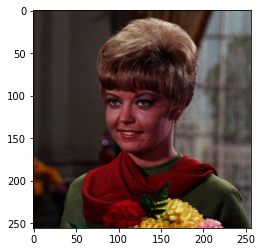

In [38]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import glob

img_ori = cv.imread('/content/drive/MyDrive/Images/female.tiff')
img_rgb = cv.cvtColor(img_ori,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


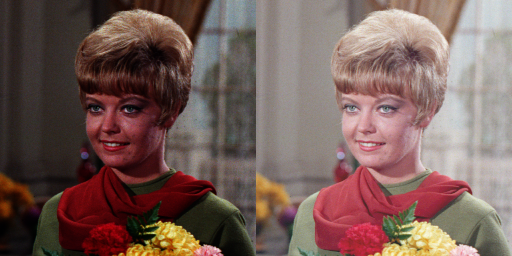

In [15]:
# nomor 1
print(' Gamma Correction pada citra ')
print('----------------------------------')
try: 
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255,(1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

 Denoising pada citra 
----------------------------------
Masukkan nilai db: 3


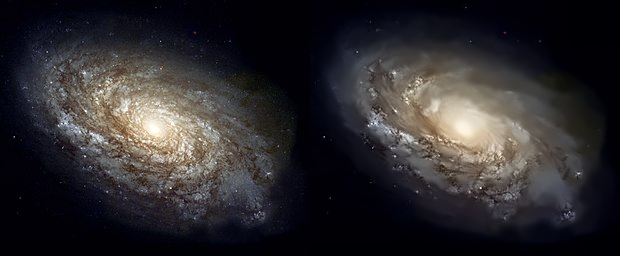

In [44]:
# Nomor 3
print(' Denoising pada citra ')
print('----------------------------------')
try:
  db = int(input('Masukkan nilai db: '))
except ValueError:
  print('Error, not a number')

img2 = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')

# denoising of image saving it into dst image 
dst = cv.fastNlMeansDenoisingColored(img2, None, 10, db, 7, 15) 

# Plotting of source and destination image 
final_frame = cv.hconcat((img2, dst))
cv2_imshow(final_frame)

In [43]:
from math import log10, sqrt 

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')# iki wes enek soko sing awak e download
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'): #ini ente ganti sesuai anda punya
  n= cv.imread(img)
  cv_img.append(n)   

denoised_image = np.zeros(cv_img[0].shape)
jumlah = 5
for i in range(jumlah):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlah)

psnr = PSNR(original, denoised_image)

print('PSNR value is ',psnr,' dB')



PSNR value is  19.52701545495805  dB


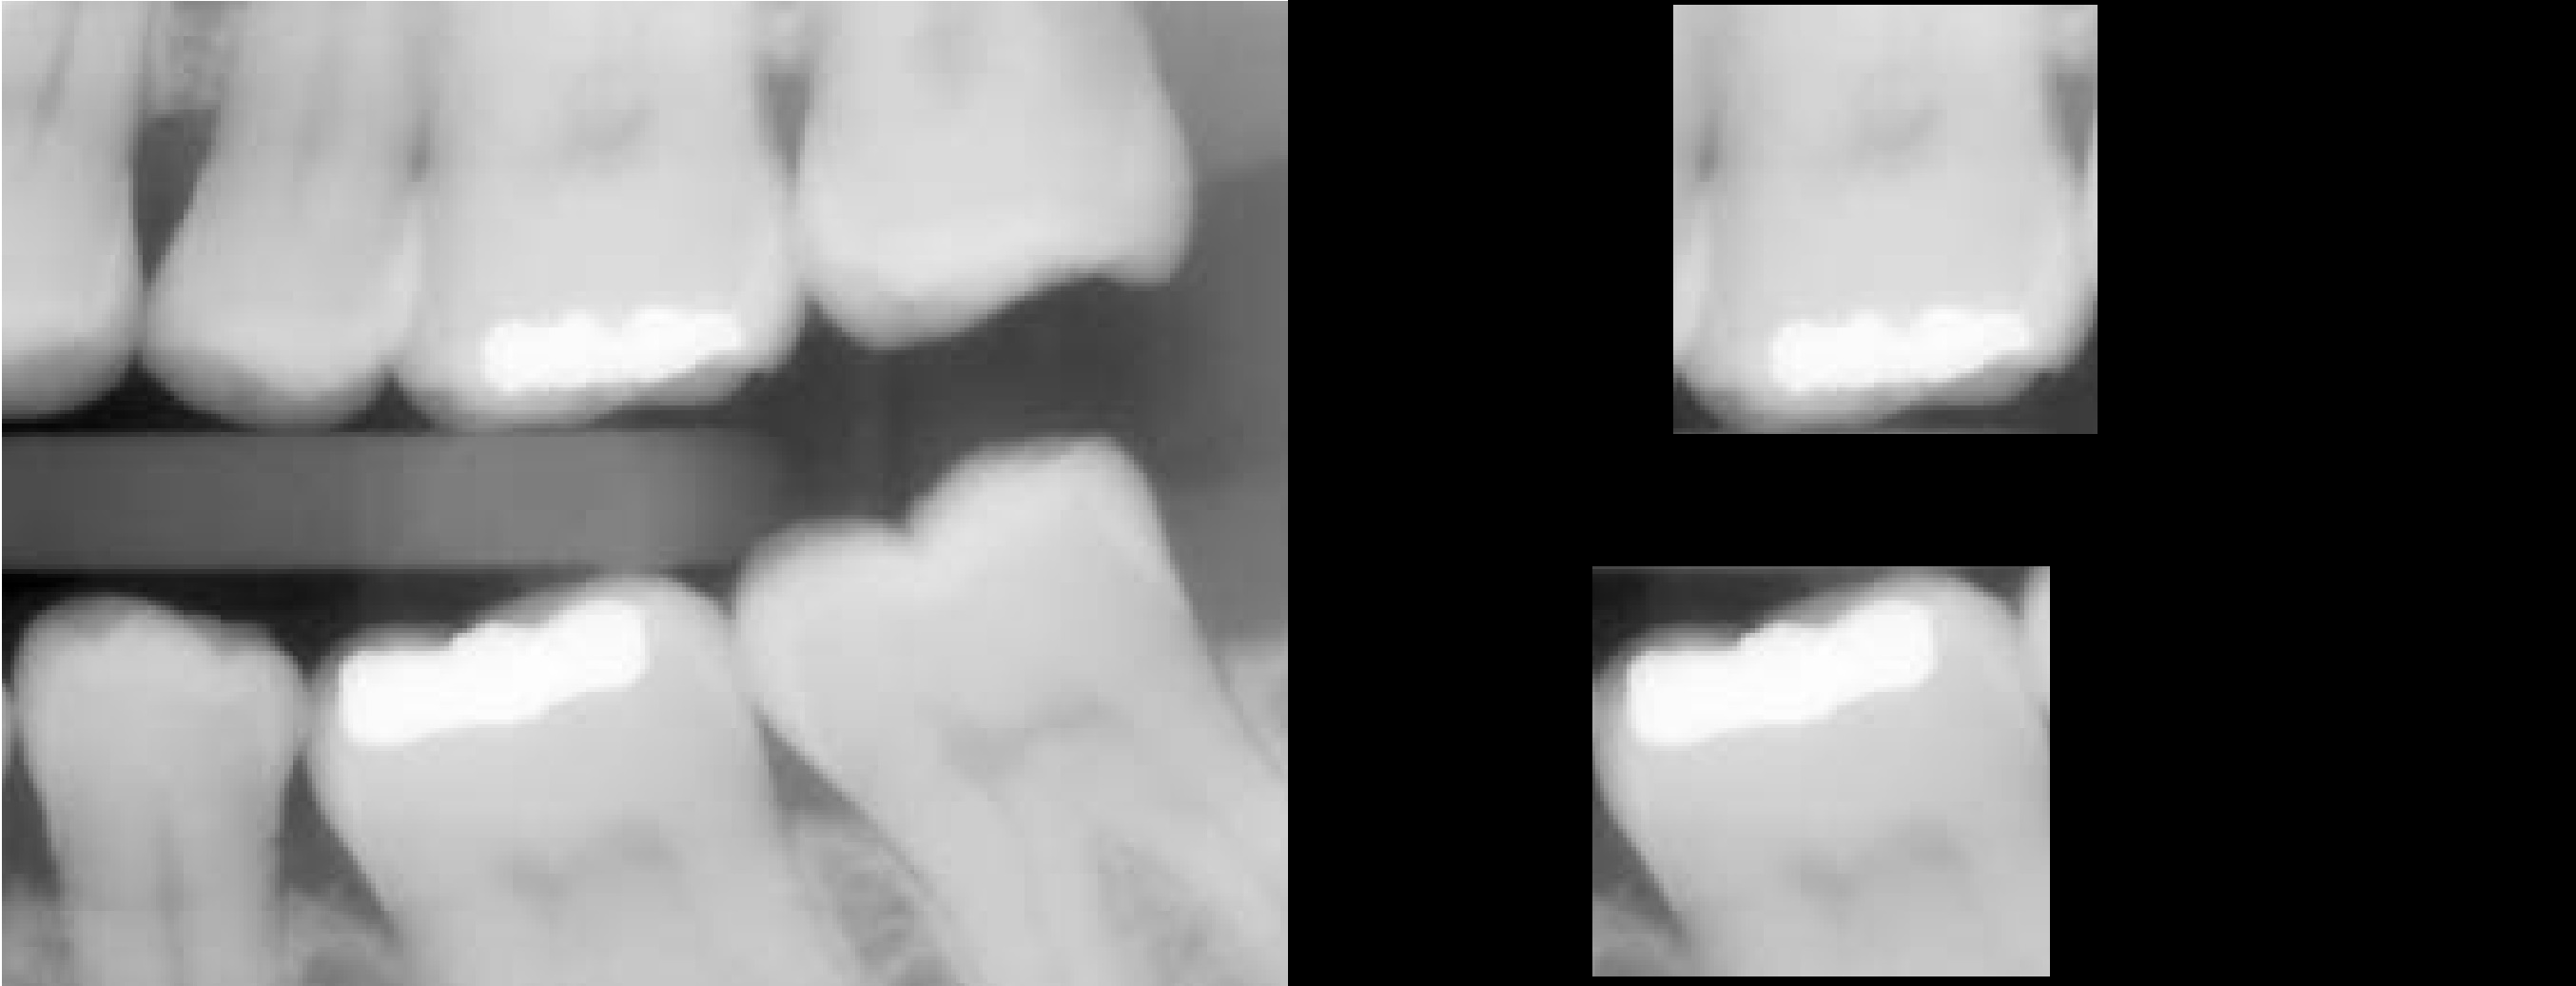

In [45]:
# Masking no 4

img = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')
#img = cv.resize(img, (0,0), fx=0.5, fy=0.5) 
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = img & mask1

final_frame = cv.hconcat((img, result))
cv2_imshow(final_frame)

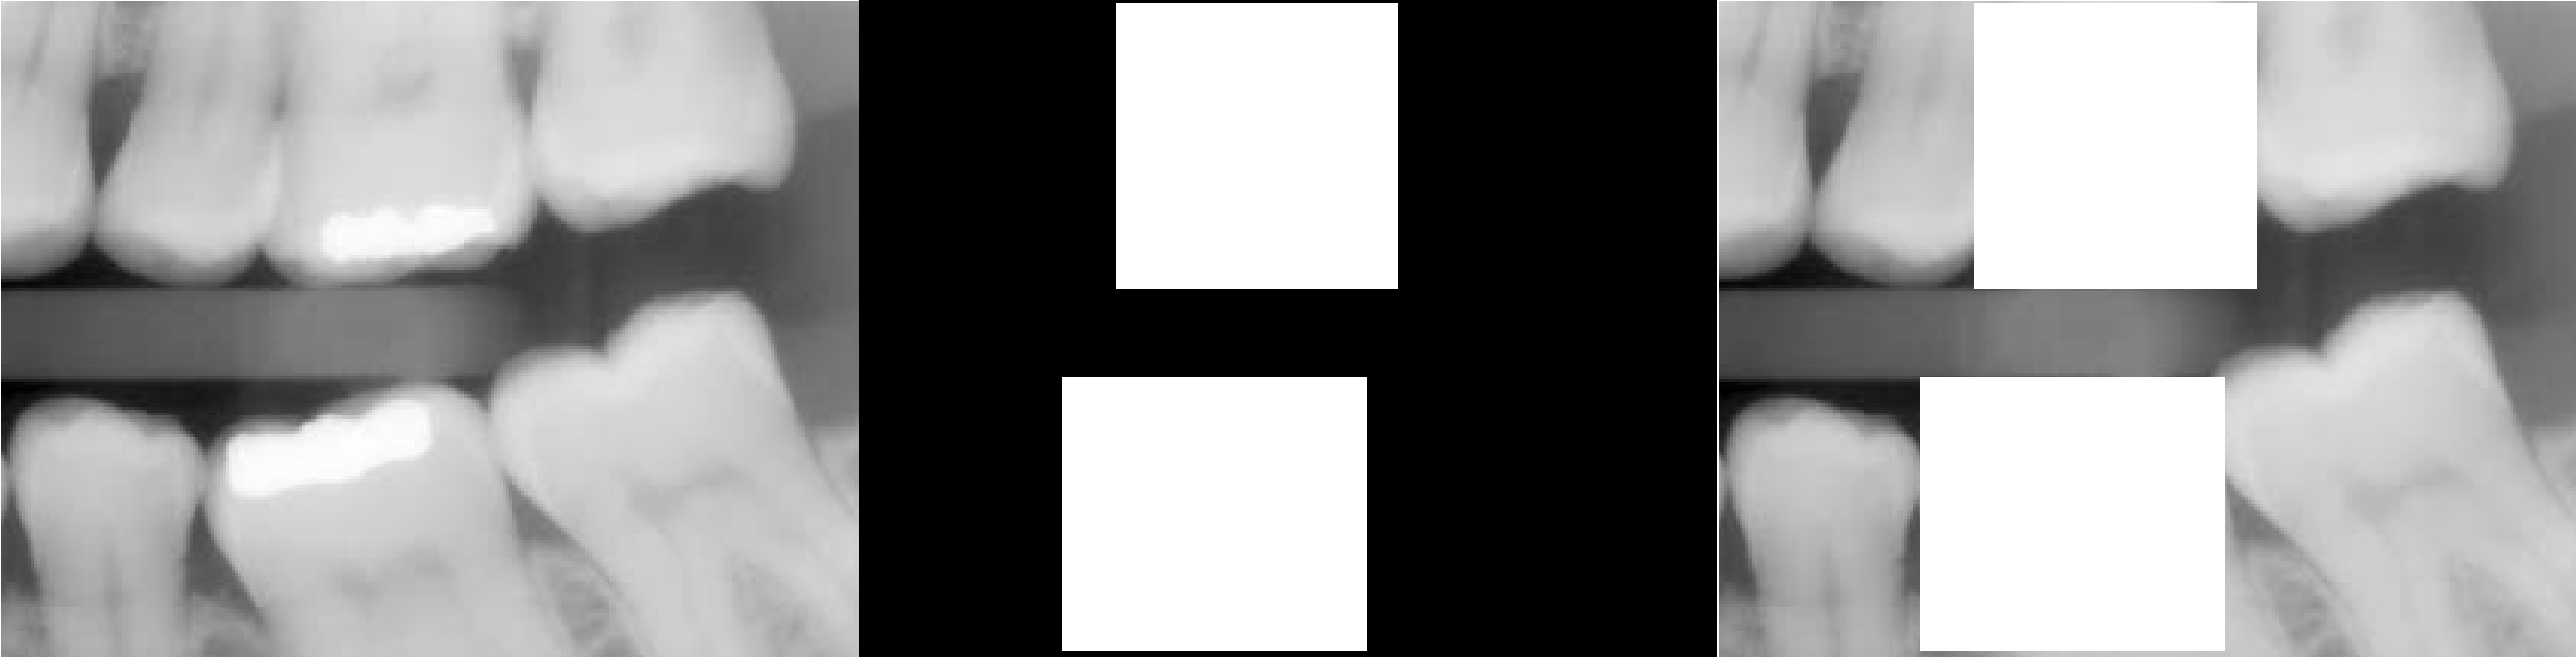

In [51]:
# 5 AND

img = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')
mask_or = np.zeros(img.shape, dtype=np.uint8)
mask_or = cv.rectangle(mask_or,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img | mask_or

mask_or1 = cv.rectangle(mask_or,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_or1 = img | mask_or1

final_frame = cv.hconcat((img, mask_or1, result_or1))
cv2_imshow(final_frame)

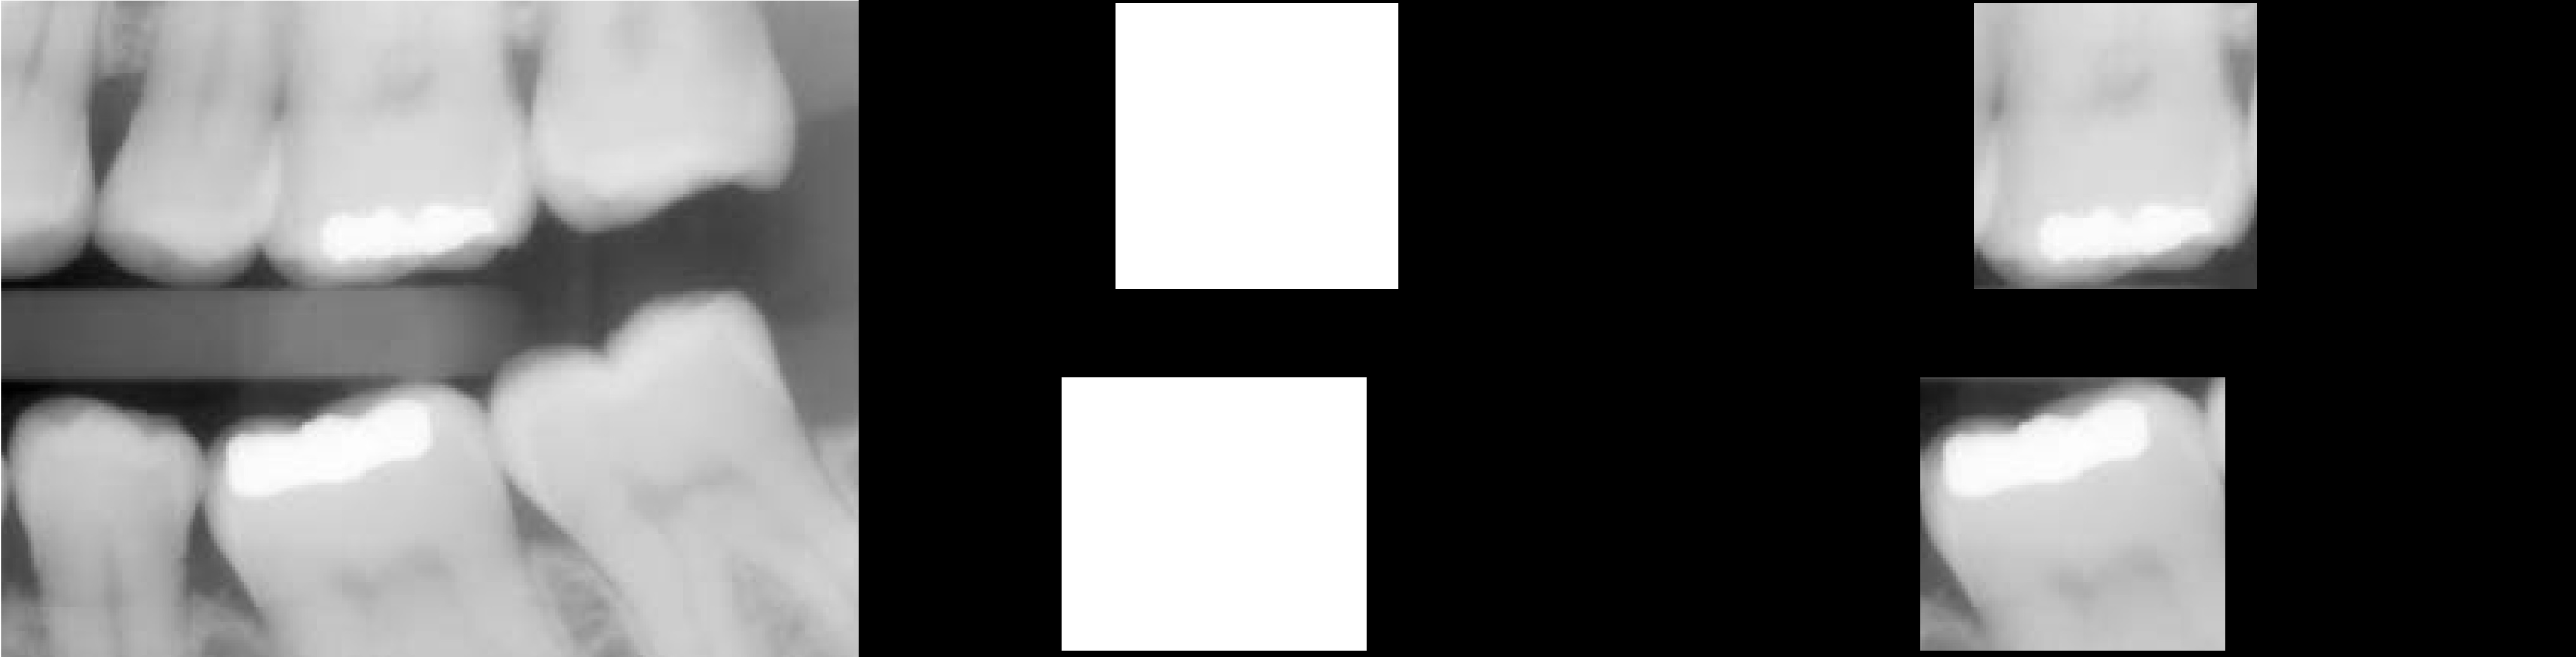

In [67]:
# 5 OR

img = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')
#img = cv.resize(img, (0,0), fx=0.5, fy=0.5) 
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = img & mask1

final_frame = cv.hconcat((img,mask1,result))
cv2_imshow(final_frame)

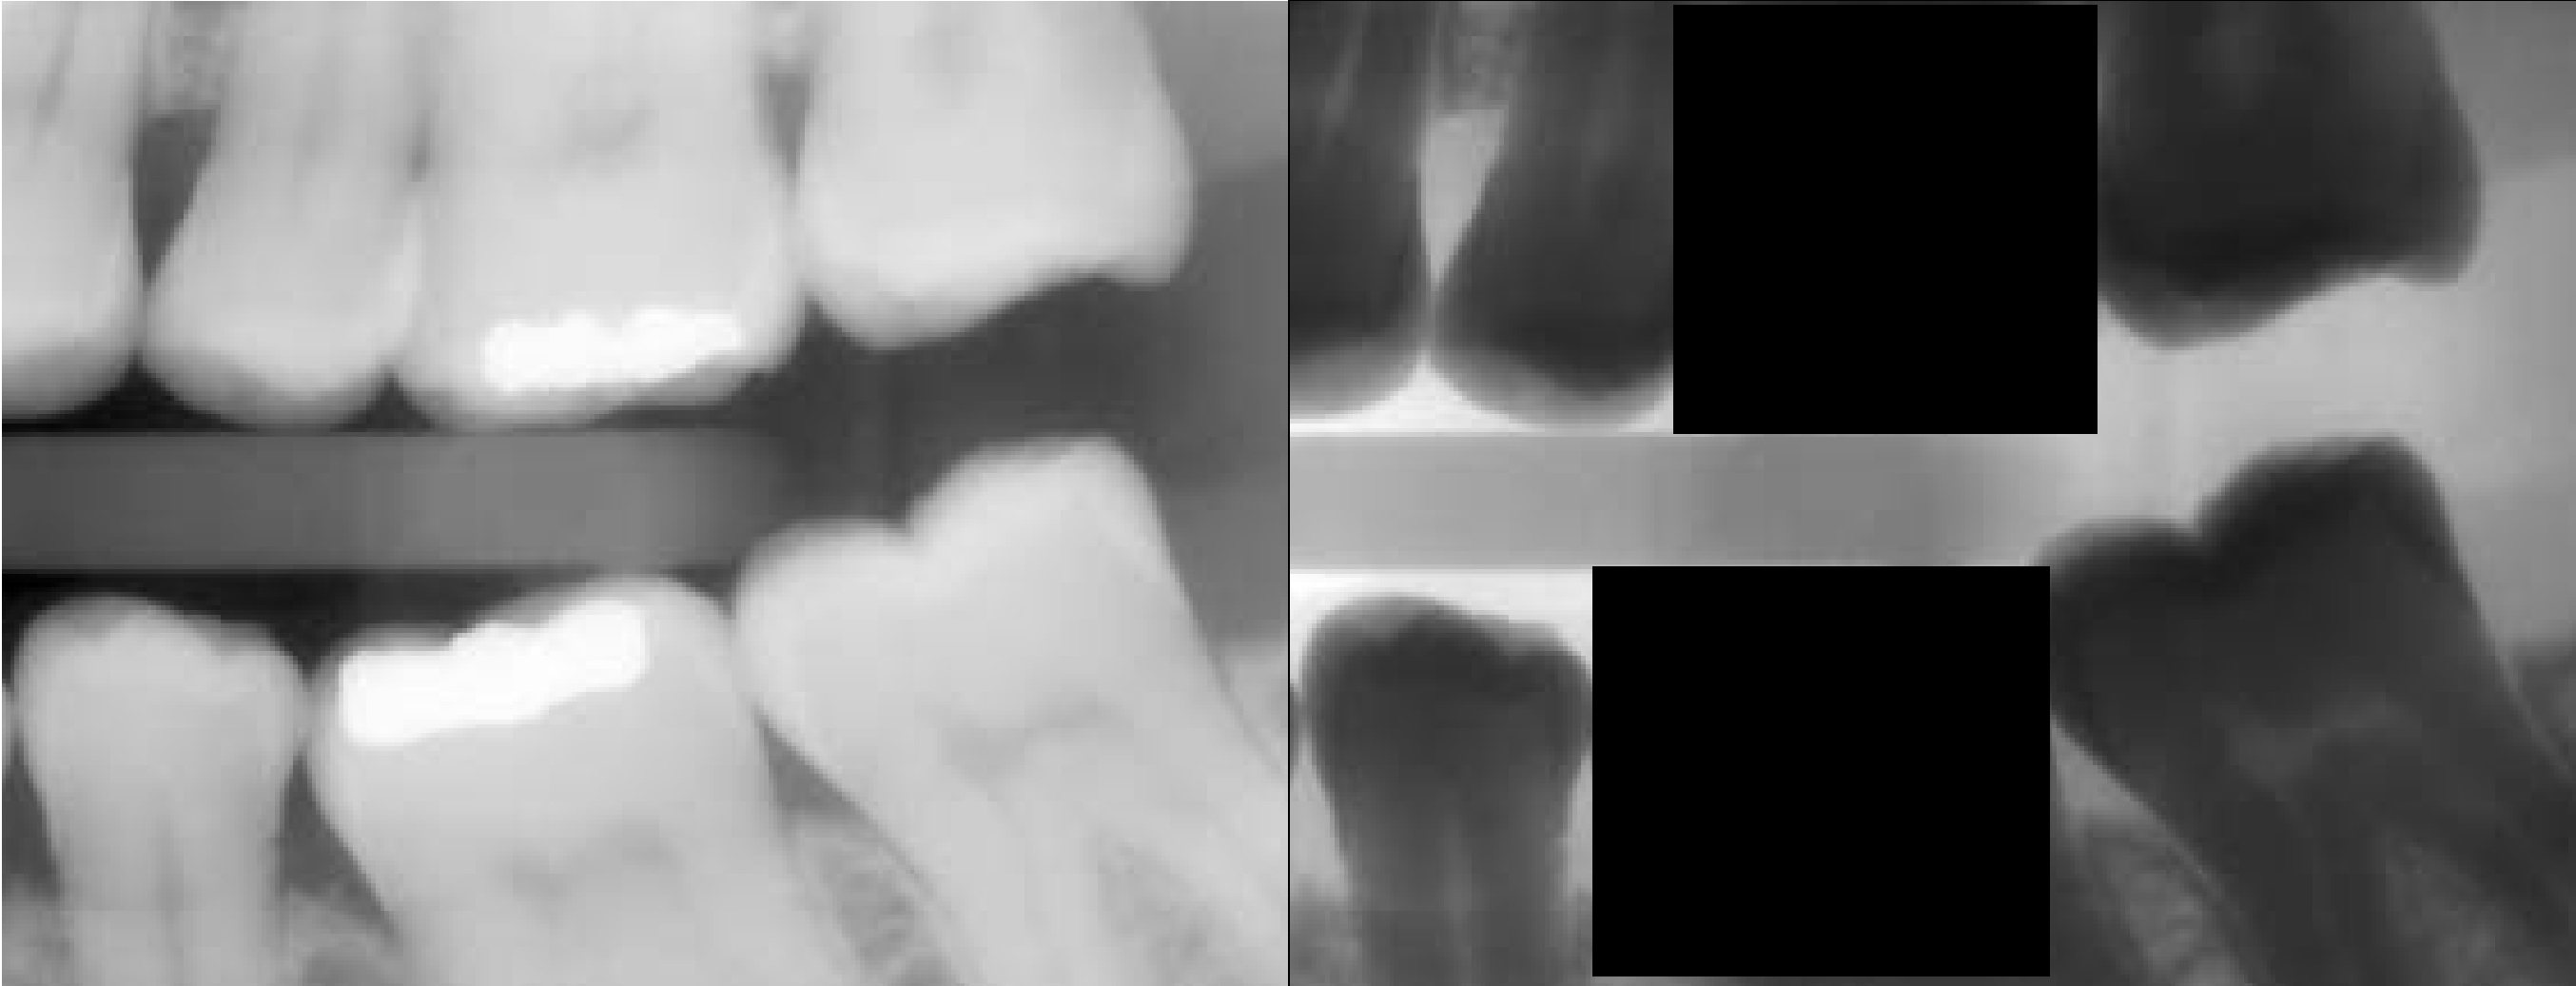

In [69]:
# 5 NOT

img = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')
mask_not = np.zeros(img.shape, dtype=np.uint8)
mask_not = cv.rectangle(mask_not,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = ~img & ~mask_not

mask_not1 = cv.rectangle(mask_not,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_not1 = ~img & ~mask_not1

final_frame = cv.hconcat((img, result_not1))
cv2_imshow(final_frame)